# Homework 3: Root Finding

### Bayu Wilson
### Professor Tom Quinn

Due May 9th

# NOTES

What is meant by a root? [See here](https://en.wikipedia.org/wiki/Root-finding_algorithm#Bisection_method)

A root of a function f, from the real numbers to real numbers or from the complex numbers to the complex numbers, is a number x such that f(x) = 0.

$f(x)=0, \space f(model)-f(data) = 0$

## $$ M = E - e sin(E) $$

## $$ \Delta t= (t-t_{peri}) = \frac{P M}{2\pi} $$

## $$ f(E) = 0  = E-esin(E)-M $$
M: mean anomoly. It is an **angle** that increases linearly in time. Proportional to time.

E: Eccentric anomoly is the position of body from the center of the ellipse. This is also an **angle**.

e: Eccentricity of the ellipse (0 is circle, 1 is parabola)

### BISECTION

$$ m = \frac{a+b}{2}$$

$$ f(m)*f(b)<0, \space (a,b)\rightarrow (m,b) $$

$$ f(a)*f(m)<0, \space (a,b) \rightarrow (a,m) $$

### NEWTON

$$ 0 = f(x) = f(x_0) + (x-x_0)f'(x_0) + \frac{(x-x_0)^2}{2}f''(x_0) $$

$$ x = x_0 - \frac{f(x_0)}{f'(x_0)} $$

$$ x_{k+1} = x_{k}-\frac{f(x_k)}{f'(x_k)} $$

### DIVISION

Solution is to force multiplication instead of doing division. What happens is actually a root finding function.

$x*a - 1 = 0,a-1.0/x=0,f'=1.0/x^2$

$ x_{k+1} = x_{k}-(ax_k^2-x_k) $

$ x_{k+1} = x_{k}(2-ax_k) $

## 1) Write a program to find the roots of one-dimensional equations using:
a) [Bisection method](https://en.wikipedia.org/wiki/Bisection_method)

b) [Newton-Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method)

### Then test my implementation:
 i) $x^2=a, \space a=2$

ii) Kepler's Equation: $ M = E - e sin(E) $

### Finally plot error
Demonstrate how quickly the method converges by plotting the error.

In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [240]:
def derivative(f,x,h):
    """
    Input is function with one dependent variable. 
    Output is value of the derivative at a point.
    """
    return (f(x+h)-f(x-h))/(2*h)
def newton_raph(f,x0,iterations,h=0.01):
    x=np.zeros(iterations)#np.zeros_like(np.arange(0,100,h))
    x[0] = x0
    for k in range(len(x)-1):
        x[k+1] = x[k] - f(x[k])/derivative(f,x[k],h)
    return x
def easy_function(x):
    """
    A simple test case. Returns function that has easy analytic root.
    """
    return x**2-2
def bisection(f,a,b,iterations):
    """
    Input: 
    `a` (f(a) is negative number)
    `b` (f(b) is positive number)
    `f` (function with one dependent variable)
    `iterations` (how many iterations of while loop)
    """
    i=0
    midpoints = [] # list containing midpoints
    while i<iterations:
        c = (a+b)/2
        midpoints.append(c)
        if f(b)*f(c)<0: 
            a=c
        elif f(a)*f(c)<0:
            b=c
        i+=1
    return np.array(midpoints) # c

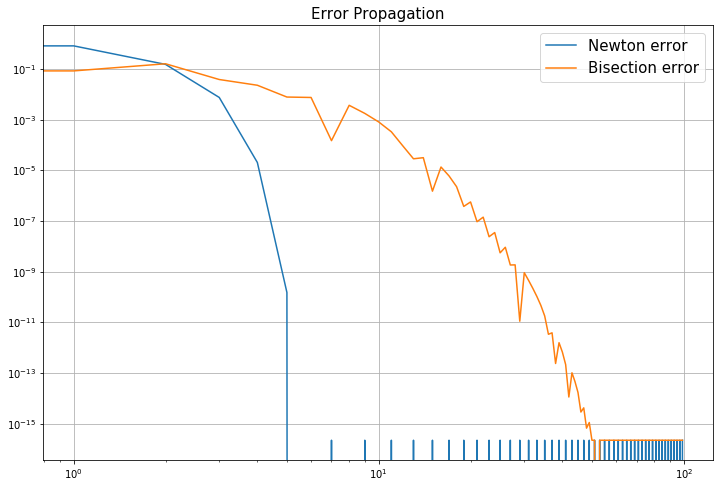

In [250]:
analytic_solution = np.sqrt(2)
easy_error_newton = newton_raph(easy_function,0.5,100) - analytic_solution
easy_error_bisection = bisection(easy_function,0,2,100) - analytic_solution

plt.figure(figsize=(12,8))
plt.title("Error Propagation",fontsize=15)
plt.grid()
plt.loglog(np.abs(easy_error_newton),label='Newton error')
plt.loglog(np.abs(easy_error_bisection),label='Bisection error')
plt.legend(loc='best', fontsize = 15);

According to the plot above, bisection method converges **slower** than the Newton-Raphson method for the function:

$$ f(x) = x^2 - 2 $$

In [260]:
print("The solution to the easy function using Newton-Raphson is: \n"+
      "{0}".format(newton_raph(easy_function,0.5,100)[-1]))
print("The solution to the easy function using bisection is: \n"+
      "{0}".format(bisection(easy_function,0,2,1000)[-1]))
print("The analytic solution is \n{0}".format(analytic_solution))

The solution to the easy function using Newton-Raphson is: 
1.414213562373095
The solution to the easy function using bisection is: 
1.414213562373095
The analytic solution is 
1.4142135623730951


# Kepler's Equation
# $$ M = E-esin(E) $$
# $$ f(E) = E-esin(E)-M $$

Solve for $E$

The plot below gives resonable ranges to guess for the Newton-Raphson method. So 2 would be a good guess!

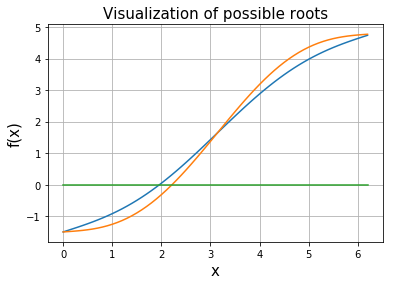

In [276]:
E_array = np.arange(0,2*np.pi,0.1)
plt.title("Visualization of possible roots",fontsize = 15)
plt.grid()
plt.xlabel('x',fontsize = 15)
plt.ylabel('f(x)',fontsize = 15)
plt.plot(E_array,kepler_equation(E_array,e1))
plt.plot(E_array,kepler_equation(E_array,e2))
plt.plot(E_array,np.zeros_like(E_array));

In [279]:
M = 1.5
e1 = 0.5
e2 = 0.9
def kepler_equation(E,e=e2):
    return E-e*np.sin(E)-M
soln_bisect_2 = bisection(lambda E: kepler_equation(E,e2),1.5,2.5,100)[-1] # CLOSURE
soln_newton_2 = newton_raph(lambda E: kepler_equation(E,e2),2,100)[-1]
soln_bisect_1 = bisection(lambda E: kepler_equation(E,e1),1.5,2.5,100)[-1] # 
soln_newton_1 = newton_raph(lambda E: kepler_equation(E,e1),2,100)[-1]

In [280]:
print("The solution to Kepler's equation using e={0} Newton-Raphson is: \n".format(e1)+
      "{0}".format(soln_newton_1))
print("The solution to Kepler's equation using e={0} bisection is: \n".format(e1)+
      "{0}".format(soln_bisect_1))
print("The solution to Kepler's equation using e={0} Newton-Raphson is: \n".format(e2)+
      "{0}".format(soln_newton_2))
print("The solution to Kepler's equation using e={0} bisection is: \n".format(e2)+
      "{0}".format(soln_bisect_2))


The solution to Kepler's equation using e=0.5 Newton-Raphson is: 
1.9621892875785714
The solution to Kepler's equation using e=0.5 bisection is: 
1.9621892875785714
The solution to Kepler's equation using e=0.9 Newton-Raphson is: 
2.2179972025985775
The solution to Kepler's equation using e=0.9 bisection is: 
2.2179972025985775


In [281]:
# np.array(bisection(lambda E: kepler_equation(E,e1),1.5,2.5,1000)) - exact_solution1

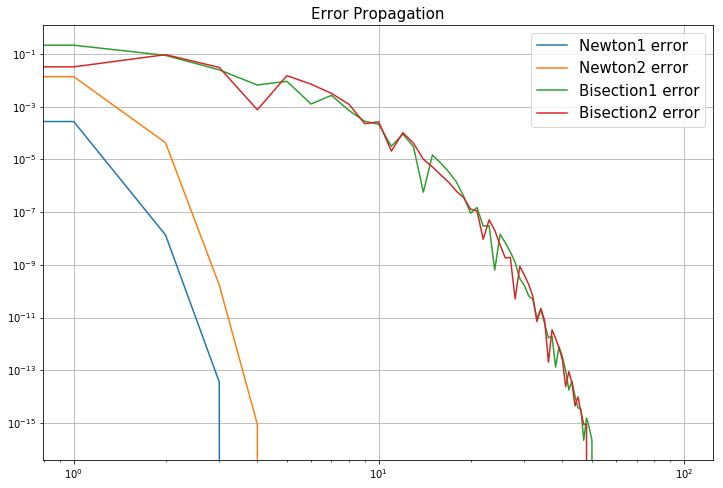

In [283]:
exact_solution1 = 1.9621892875785714
exact_solution2 = 2.2179972025985775
kepler1_error_newton = newton_raph(lambda E: kepler_equation(E,e1),2,100) - exact_solution1
kepler2_error_newton = newton_raph(lambda E: kepler_equation(E,e2),2,100) - exact_solution2
kepler1_error_bisection = bisection(lambda E: kepler_equation(E,e1),1.5,2.5,100) - exact_solution1
kepler2_error_bisection = bisection(lambda E: kepler_equation(E,e2),1.5,2.5,100) - exact_solution2

plt.figure(figsize=(12,8))
plt.title("Error Propagation",fontsize=15)
plt.grid()
plt.loglog(np.abs(kepler1_error_newton),label='Newton1 error')
plt.loglog(np.abs(kepler2_error_newton),label='Newton2 error')
plt.loglog(np.abs(kepler1_error_bisection),label='Bisection1 error')
plt.loglog(np.abs(kepler2_error_bisection),label='Bisection2 error')
plt.legend(loc='best', fontsize = 15);

Again, the Newton-Raphson method converges to the solution **faster** than the Bisection method.

# Problem 2
## Kepler Precision

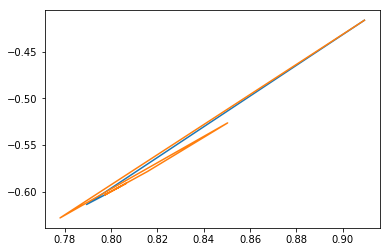

In [294]:
E_newton = newton_raph(lambda E: kepler_equation(E,e=0.9),2,20)
E_bisect = bisection(lambda E: kepler_equation(E,e=0.9),1.5,2.5,20)
# def kepler_equation2(E,e=e2):
#     return E-e*np.sin(E)-M
plt.plot(np.sin(E_newton),np.cos(E_newton))
plt.plot(np.sin(E_bisect),np.cos(E_bisect))